In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (6,4)

# 1:
## We have tried to numerically solve the below ODE using a basic shooting method.
## First we tackle Drought Period
## The ODE we tried to solve was 
## $x'^{2}+xx''+x=0$   from eqn 4.78 in the notes
## With the boundary conditions 
### $X(0)=0$
### $X'(1)=0$
## Re-arranged to get 
## $x'' = \frac{-x-x'^2}{x}$

Text(0.5, 1.0, 'Shooting Method X(x)')

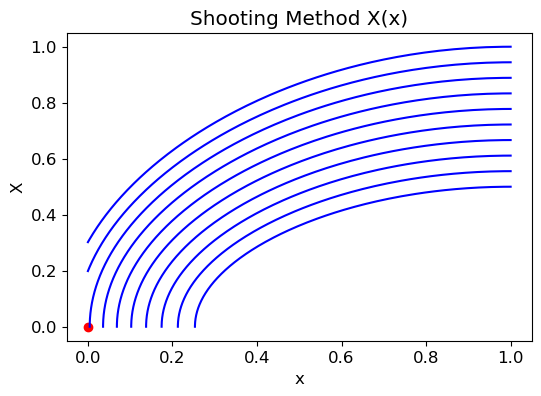

In [66]:
def X(t,y):
    return [y[1],(-y[0]-y[1]**2)/y[0]]


endvals = np.linspace(0.5,1,10)

for el in endvals:
    sol =solve_ivp(X,[1,0],[el,0],rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.plot(t,y[0],c='b')
   
plt.scatter(0,0,c='r')
plt.xlabel('x')
plt.ylabel('X')
plt.title('Shooting Method X(x)')

## We find the best X(x)

0.89


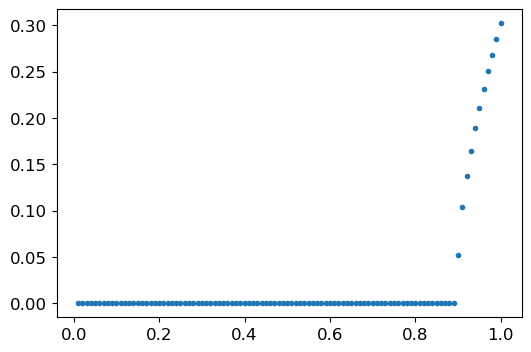

In [69]:
initderiv = np.linspace(0.01,1,100)
yx1 = np.array([])
for el in initderiv:
    sol =solve_ivp(X,[1,0],[el,0], rtol=1e-12,atol = 1e-12)
    t = sol.t
    yx1 = np.append(yx1,sol.y[0][-1])

plt.plot(initderiv,yx1,'.')

i= len(initderiv)-1
tol = 10e-6
while (i>0):
    if (yx1[i]<=tol):
        boundary = initderiv[i]
        break
    i+=-1
print(boundary)

## We pick the best boundary

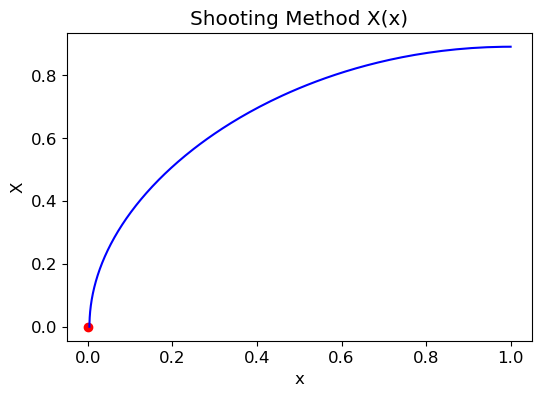

In [72]:
sol =solve_ivp(X,[1,0],[boundary,0],rtol=1e-12,atol = 1e-12)
y = sol.y
t = sol.t
plt.plot(t,y[0],c='b')
   
plt.scatter(0,0,c='r')
plt.xlabel('x')
plt.ylabel('X')
plt.title('Shooting Method X(x)')

X = y[0]
dX = y[1]
x = t

## We have that $ H(x) = \frac{X(x)}{\hat t + A} $
## We have that $ A = \frac{X(x)}{h_0(x)}$ set A = 1

## Height of Aquifer over Time 

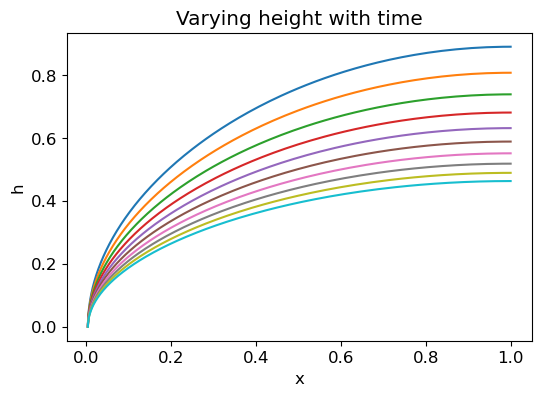

In [76]:
t = np.linspace(0,1,len(X))
h0 = 1
A = X/h0
h = np.zeros([len(x),len(t)])
i=0
while i < len(t):
    h[:,i] = X[:]/(1+t[i])
    i=i+1
plt.plot(x,h[:,::200])
plt.xlabel('x')
plt.ylabel('h')
plt.title('Varying height with time')
plt.show()

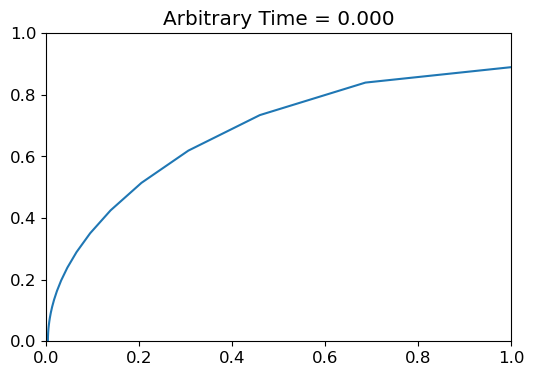

In [77]:
fig, ax = plt.subplots()
ax.axis([0,1,0,1])
x_1 = x[::20]
h_1 = h[::20,::20]

l, = ax.plot([],[])

def animate(i):
    l.set_data(x_1, h_1[:,i])
    ax.set_title('Arbitrary Time = %.3f'%(i/100))
    
ani = FuncAnimation(fig, animate, frames=len(h_1),interval=50)

from IPython.display import HTML
HTML(ani.to_jshtml())

# 2
## Rainfall
## $f-\eta f' = (ff')'+1$ eqn 4.55
## With Boundary Conditions
### $f(0) = 0 , f(\eta) = 1 $  as $ \eta \rightarrow \infty$

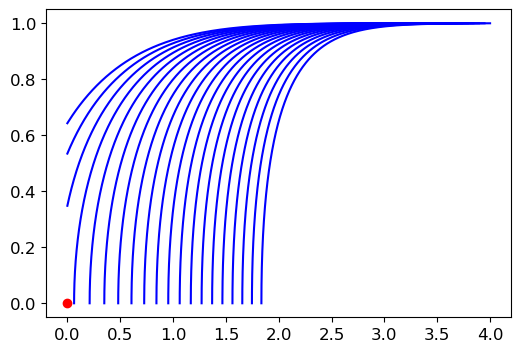

In [80]:
def f(t,y):
    return [y[1],(y[0]-t*y[1]-y[1]**2-1)/y[0]]


initderiv = np.linspace(3,4,20)

for el in initderiv:
    sol =solve_ivp(f,[el,0],[1,0.001],rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.plot(t,y[0],c='b')

plt.scatter(0,0,c='r')

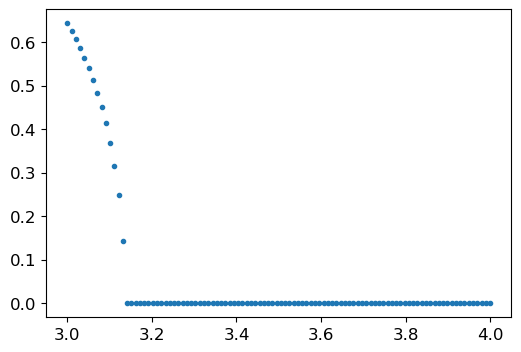

In [81]:
initderiv = np.linspace(3,4,100)
yx1 = np.array([])
for el in initderiv:
    sol =solve_ivp(f,[el,0],[1,0.001], rtol=1e-12,atol = 1e-12)
    t = sol.t
    yx1 = np.append(yx1,sol.y[0][-1])

plt.plot(initderiv,yx1,'.')

In [82]:
tol = 10e-6
i=0
while (i<len(initderiv)):
    if (yx1[i]<=tol):
        boundary = initderiv[i]
        break
    i+=1
boundary

3.1414141414141414

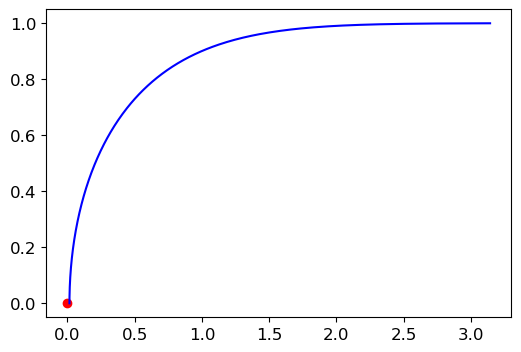

In [83]:
sol =solve_ivp(f,[boundary,0],[1,0.001],rtol=1e-12,atol = 1e-12)
y = sol.y
t = sol.t
## Extract values used for plotting height later
f_rain = y[0]
eta_rain = t

plt.plot(t,y[0],c='b')
plt.scatter(0,0,c='r')

## Now adding in variable Rainfall. Changing R

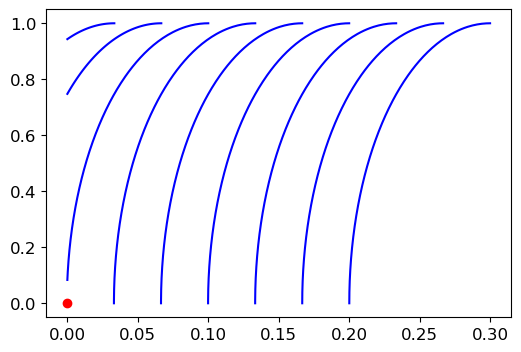

In [85]:
def frain(t,y,R):
    return [y[1],(y[0]-t*y[1]-y[1]**2-R)/y[0]]


initderiv = np.linspace(0,0.3,10)

R = 100

for el in initderiv:
    sol =solve_ivp(frain,[el,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.plot(t,y[0],c='b')

plt.scatter(0,0,c='r')

In [86]:
def frainbest(R):
    ## remember to change searching region for true right bound
    initderiv = np.linspace(0,0.3,100)
    yx1 = np.array([])
    for el in initderiv:
        sol =solve_ivp(frain,[el,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
        t = sol.t
        yx1 = np.append(yx1,sol.y[0][-1])
    tol = 10e-4
    i=0
    while (i<len(initderiv)):
        if (yx1[i]<=tol):
            boundary = initderiv[i]
            break
        i+=1
    sol =solve_ivp(frain,[boundary,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    plt.figure()
    plt.plot(t,y[0],c='b')
    plt.scatter(0,0,c='r')
    plt.title('boundary = %.2f and %.2f'%(boundary,R))
    C = y[0][-1]*y[1][-1]
    print(C,boundary)
    return C,boundary

14.128440569647648 0.07272727272727272


(14.128440569647648, 0.07272727272727272)

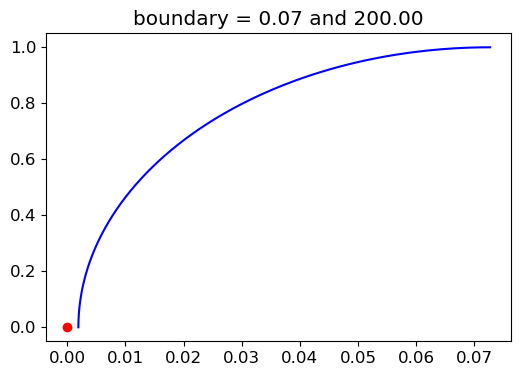

In [87]:
RainfallRate = 200
frainbest(RainfallRate)

## Height of aquifier over time with rainfall

### Finding it difficult to convert back to h = tf(x/t), our plot is h vs eta, does this make sense?
### If so why does is go so high?

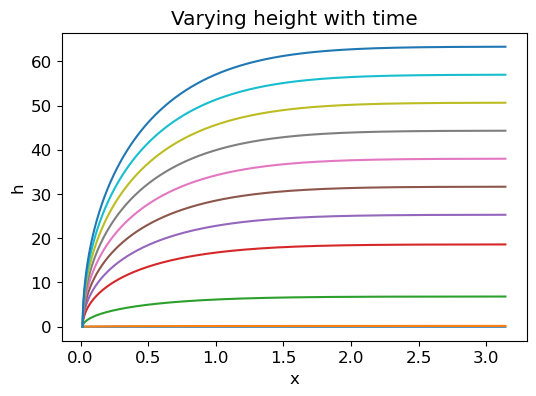

In [89]:
x_rain = np.linspace(0,1,len(eta_rain))
t_rain = x_rain/eta_rain
h_rain = np.zeros([len(x_rain),len(t_rain)])
#print(h_rain.shape)

i=0
while (i < len(eta_rain)):
    h_rain[:,i] = t_rain[i]*f_rain[:] 
    i=i+1
#plt.plot(eta_rain, h_rain[:,::200])
plt.plot(eta_rain, h_rain[:,::200])
plt.xlabel('x')
plt.ylabel('h')
plt.title('Varying height with time')
plt.show()

# Are we alleged, Why does h go so high?



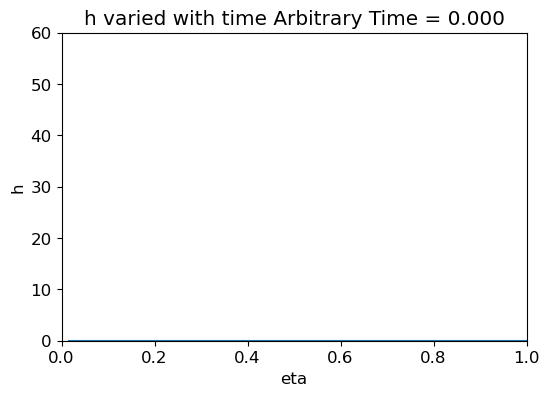

In [115]:
fig, ax = plt.subplots()
ax.axis([0,1,0,60])
#x_2 = x_rain[::20]
h_2 = h_rain[::20,::20]

l, = ax.plot([],[])

def animate(i):
    l.set_data(eta_rain[::20], h_2[:,i])
    ax.set_title('h varied with time Arbitrary Time = %.3f'%(i/100))
    ax.set_xlabel('eta')
    ax.set_ylabel('h')


ani = FuncAnimation(fig, animate, frames=len(h_2),interval=50)

from IPython.display import HTML
HTML(ani.to_jshtml())

# 3

## Calculating Flux

### Combining Rainfall and Drought

### We use that the flux with rainfall is 
### $\hat {Q}_0 = -\hat{t}f(0)f'(0) = \frac{-C^2 \hat t}{2}$    eqn 4.64
### $\hat Q_0 = \frac{-D^2}{2\hat t^2}$   eqn 4.90
### Therefore we make these equal to solve for A
## We have from the notes $D = \sqrt{2X(0)X'(0)} $
### We get $A = \pm \sqrt{(\frac{2D^2}{C^2t})}-t$
### Just to note we use the absolute value of this Flux

In [118]:
def frainbest(R):
    ## remember to change searching region for true right bound
    initderiv = np.linspace(3,4,100)
    yx1 = np.array([])
    for el in initderiv:
        sol =solve_ivp(frain,[el,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
        t = sol.t
        yx1 = np.append(yx1,sol.y[0][-1])
    tol = 10e-4
    i=0
    while (i<len(initderiv)):
        if (yx1[i]<=tol):
            boundary = initderiv[i]
            break
        i+=1
    sol =solve_ivp(frain,[boundary,0],[1,0.001],args = (R,), rtol=1e-12,atol = 1e-12)
    y = sol.y
    t = sol.t
    C = np.sqrt(2*y[0][-1]*y[1][-1])
    return C,boundary

In [119]:
C,boundary = frainbest(1)
C

1.2183396582162898

In [122]:
D =np.sqrt(2* X[-1]*dX[-1])
D

1.1709401241247828

In [123]:
def Afind(t,C,D):
    return +(np.sqrt(D**2/(C**2*t))-t)

A = Afind(1,C,D)

def QDrought(t,D,A):
    return -D**2/(2*((t+A)**2))

def Qrain(t,C):
    return -C**2*t/2
print(Afind(1,C,D))

-0.038905024368083296


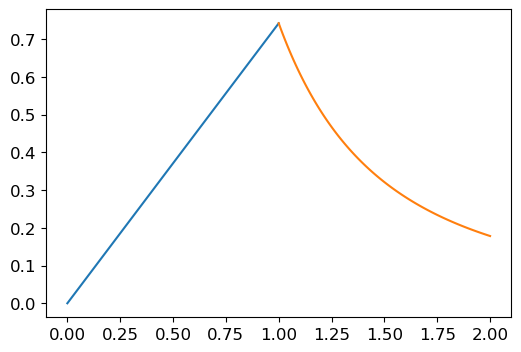

In [124]:
t1 = np.linspace(0,1,100)
t2 = np.linspace(1,2,100)
plt.plot(t1,np.abs(Qrain(t1,C)))
plt.plot(t2,np.abs(QDrought(t2,D,A)))

# 4

## Parameter search with data

## We are plotting discharge
## further details here https://data.usgs.gov/datacatalog/data/USGS:5dcd62fae4b069579760aedd

## There are 5 different data sets

In [135]:
excel_file=pd.ExcelFile('hyrdodata.xlsx')
df=pd.read_excel(excel_file, sheet_name="figure 2_unit_hydrograph")

### Re dim
### Defining constants

In [158]:
k = 10**(-2)

mu = 10**(-3)

rho = 1020

phi = 0.4

L = 5*10**3

H = 100
 
g = 9.81

U = (k*rho*g*H)/(mu*L)

tau = phi*L/U

def Afindredim(t,C,D):
    return +(np.sqrt(D**2*tau/(C**2*t))-t/tau)

def QDroughtredim(t,D,A):
    return -D**2/(2*(t/tau+A)**2)

def Qrainredim(t,C):
    return -C**2/2*(t/tau)

In [160]:
def split_t(time,flux):
    maxflux = flux.max()           
    maxindex = flux.idxmax() 
    #print(maxt,maxindex)
    t1 = time[:maxindex+1]
    t2 = time[maxindex:]
    t1 = t1.to_numpy()
    t2 = t2.to_numpy()
    return t1,t2

In [162]:
t = df["Time"][:373]
avgstart = df["peakAvg_start"][:373]

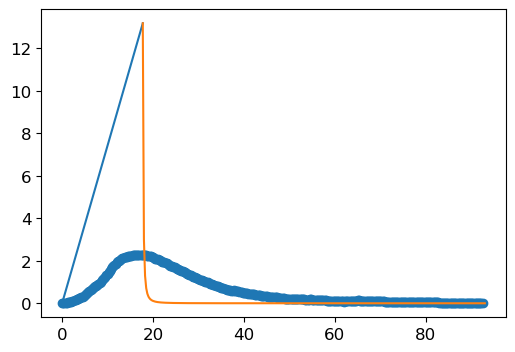

In [164]:
t1,t2 = split_t(t,avgstart)
plt.plot(t1,np.abs(Qrainredim(t1,C)))
plt.plot(t2,np.abs(QDroughtredim(t2,D,Afindredim(t1[-1],C,D))))
plt.scatter(t,avgstart)

## Now fit parameters

### Fitting H

In [167]:
def Flux(t,fluxdata,H):
    U = (k*rho*g*H)/(mu*L)
    tau = phi*L/U
    t1,t2 = split_t(t,fluxdata)
    A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    Qrain = -C**2/2*(t1/tau)
    Qdrought = -D**2/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

In [169]:
def L2norm(H,t,fluxdata,t1testinterval,t2testinterval):
    Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H)  
    #print(t1points)
    dif1 = 0
    dif2 = 0
    i = 0
    while (i<len(t1)):
        dif1 += np.abs(Qrain[i]-avgstart[i])
        i += t1testinterval
    i = 0  
    while (i<len(t2)):
        dif2 += np.abs(Qdrought[i]-avgstart[i])
        i += t2testinterval
    diftotal = dif1+dif2
    return diftotal
L2norm(H,t,avgstart,1,2)

517.1612383288777

In [171]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = 5 

# FixME use ML algorithm to minimise

result = minimize(L2norm, initial_param, args=(t,avgstart,1,1), method="L-BFGS-B")
H = result.x[0]
print(H)

18.3251454900454


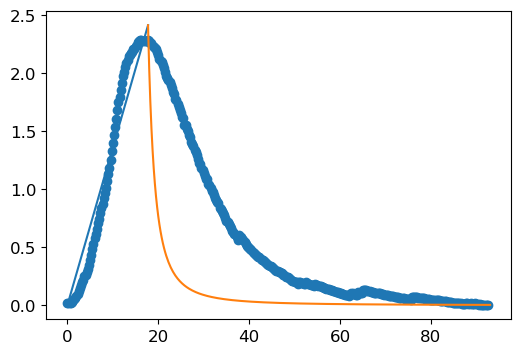

In [173]:
Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H)

plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)

### Adding in C

In [183]:
def Flux(t,fluxdata,H,C):
    U = (k*rho*g*H)/(mu*L)
    tau = phi*L/U
    t1,t2 = split_t(t,fluxdata)
    A = +(np.sqrt(D**2*tau/(C**2*t1[-1]))-t1[-1]/tau)
    Qrain = -C**2/2*(t1/tau)
    Qdrought = -D**2/(2*(t2/tau+A)**2)
    return np.abs(Qdrought),np.abs(Qrain),t1,t2

In [192]:
def L2norm(param,t,fluxdata,t1testinterval,t2testinterval):
    H = param[0]
    C = param[1]
    Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,C)  
    #print(t1points)
    dif1 = 0
    dif2 = 0
    i = 0
    while (i<len(t1)):
        dif1 += np.abs(Qrain[i]-avgstart[i])
        i += t1testinterval
    i = 0  
    while (i<len(t2)):
        dif2 += np.abs(Qdrought[i]-avgstart[i])
        i += t2testinterval
    diftotal = dif1+dif2
    return diftotal
#L2norm(,t,avgstart,1,2)

In [214]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = [5,5] 

# FixME use ML algorithm to minimise

result = minimize(L2norm, initial_param, args=(t,avgstart,1,2), method="L-BFGS-B")
H = result.x[0]
C = result.x[1]
print(H,C)

1.588648624204535 4.1386962379125585


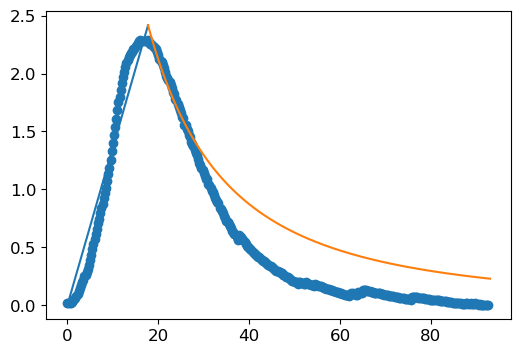

In [216]:
Qdrought,Qrain,t1,t2 = Flux(t,avgstart,H,C)

plt.plot(t1,Qrain)
plt.plot(t2,Qdrought)
plt.scatter(t,avgstart)